In [1]:
#Let's import some relevant libraries.
import numpy as np
import seaborn as sn
import pandas as pd 
import matplotlib.pyplot as plt
import warnings

dataset = pd.read_csv('heart.csv', sep=',')# Loading our data.
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

### Data visualization
### we will just visualize the frequency of heart disease based on the sex, the quantity of serum cholesterol

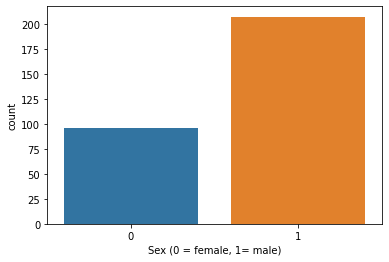

In [5]:
sn.countplot(x='sex', data=dataset)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

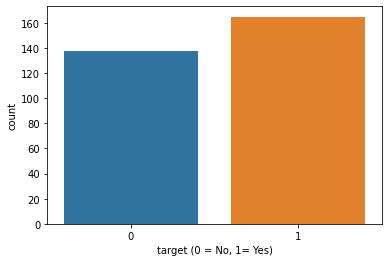

In [6]:
sn.countplot(x="target", data=dataset)
plt.xlabel("target (0 = No, 1= Yes)")
plt.show()

Text(0.5, 0, 'x(0=Have not, 1= Have)')

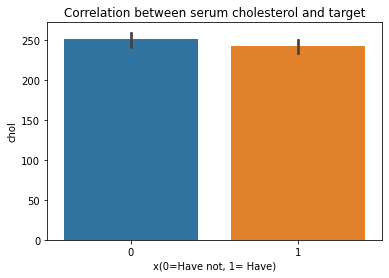

In [7]:
sn.barplot(data=dataset, x='target', y='chol').set(title='Correlation between serum cholesterol and target')
plt.xlabel('x(0=Have not, 1= Have)')

### Feature transformation

In [8]:
#cp', 'thal' and 'slope' are categorical variables let's turn them into dummy variables.

a = pd.get_dummies(dataset['cp'], prefix = "cp")
b = pd.get_dummies(dataset['thal'], prefix = "thal")
c = pd.get_dummies(dataset['slope'], prefix = "slope")

frames = [dataset, a, b, c] # Adding the new variables(a,b,c) in our dataframe and dropping the old ones.
dataset = pd.concat(frames, axis = 1)
df = dataset.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


### Based on our understanding of the problem we will apply a linear regression algorithm to predict if a person will have heart disease or not.

In [9]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

y = df.target.values
x= df.drop(['target'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))


Accuracy=0.85


C:\Users\hniki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


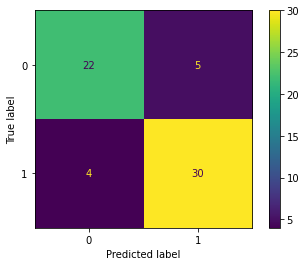

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



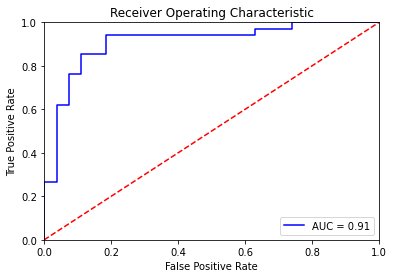

In [12]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification.
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds) 
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) # we are plotting True Positive Rate vs 
#False Positive Ratewith the blue line.

plt.legend() #To display the AUC value in the graph.

plt.plot([0, 1], [0, 1],'r--') #The red dotted line shows where True Positive Rate =False Positive Rate.

#Our graph should be in values between (0,0),(1,1).
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show() # To display a graph that will show TPR vs FPR at all thresholds.

### AUC= 0.91 it is near to the 1 which means our model has a good measure of separability